<a href="https://colab.research.google.com/github/IzaLech/MyProjects/blob/main/Iris_Dataset_with_Scikit_Learn_Library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IRIS DATASET**


---



Moim celem jest zbudowanie algorytmu, który na podstawie danych wejściowych takich jak długość i szerokość płatka kwiatu, przedstawi prawdopodobieństwo do której z kategorii (klasy): setosa, versicolor czy virginica należy badany kwiat kosaćca.

W tym celu posłużę się trzema modelami:
- Algorytm 1: Model drzew decyzyjnych.
- Algorytm 2: Algorytm k-najbliższych sąsiadów.
- Algorytm 3: Model lasu losowego.

Następnie określę, który z algorytmów jest najskuteczniejszy.



---


*Użyte biblioteki i komponenty*:
- pandas
- numpy
- matplotlib
- seaborn
- sckit-learn
- IPython
- mlxtend
- six
- pydotplus

**Krok 1: Import bibliotek.**

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

from IPython.display import Image
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from mlxtend.plotting import plot_decision_regions
from six import StringIO
import pydotplus
from sklearn.tree import export_graphviz

**Krok 2: Załadowanie danych.**

In [3]:
iris = load_iris()
data = iris.data
targets = iris.target
feature_names = [name.replace(' ', '_')[:-5] for name in iris.feature_names]
class_names = iris.target_names
data_targets = np.c_[data, targets]

df = pd.DataFrame(data_targets, columns = feature_names + ['class'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
print(f'Liczba próbek: {len(data)}')
print(f'Kształt danych: {data.shape}')
print(f'Nazwy zmiennych objaśniających: {feature_names}')
print(f'Nazwy kategorii kosaćca: {class_names}')

Liczba próbek: 150
Kształt danych: (150, 4)
Nazwy zmiennych objaśniających: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Nazwy kategorii kosaćca: ['setosa' 'versicolor' 'virginica']


**Krok 3: Eksploracja danych.**

In [5]:
# Iris Setosa - klasa 0.0
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_setosa.jpg', width=200)

In [6]:
# Iris Versicolor - klasa 1.0
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_versicolor.jpg', width=200)

In [7]:
# Iris Virginica - klasa 2.0
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_virginica.jpg', width=200)

In [8]:
df.describe().T.apply(lambda x: round(x, 2))

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.84,0.83,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.06,0.44,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.76,1.77,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.20,0.76,0.1,0.3,1.30,1.8,2.5
class,150.0,1.00,0.82,0.0,0.0,1.00,2.0,2.0


Legenda klas:

- klasa 0.0: Iris Setosa
- klasa 1.0: Iris Versicolor
- klasa 2.0: Iris Virginica

**Krok 4: Rozkład zmiennych na wykresie.**


*   podział na klasy ze względu na długość/szerokość płatków kwiata




[]

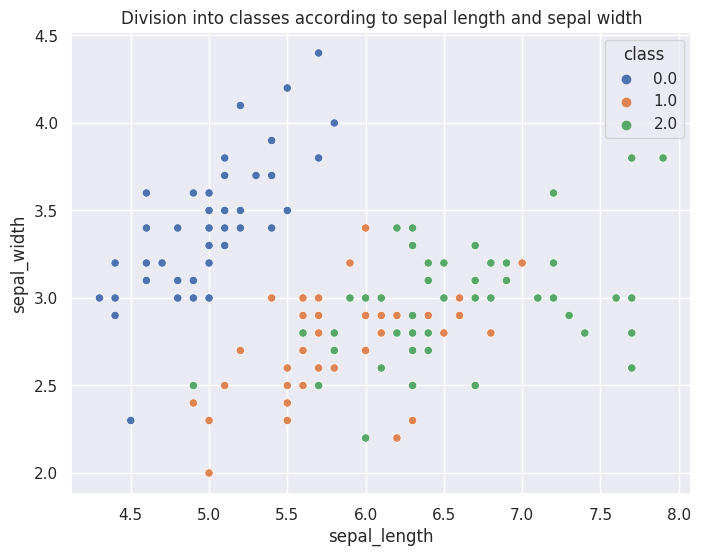

In [11]:
plt.figure(figsize=(8, 6))
_ = sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='class',  legend='full', palette=sns.color_palette()[:3])
plt.title("Division into classes according to sepal length and sepal width")
plt.plot()

[]

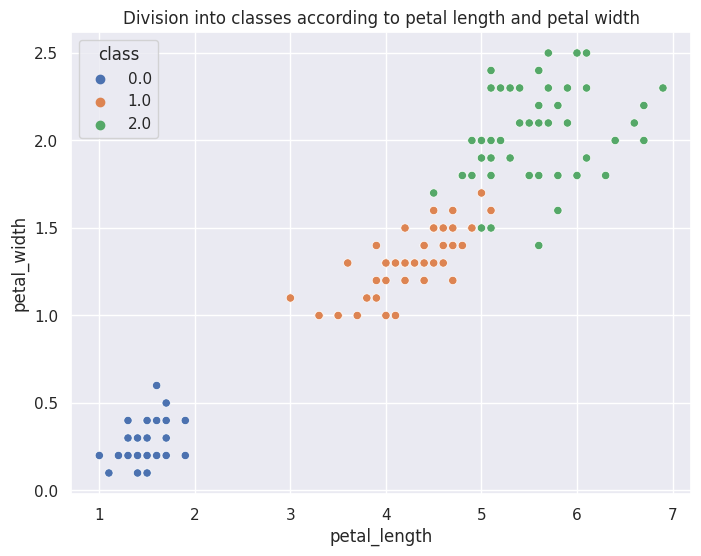

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='class',  legend='full', palette=sns.color_palette()[:3])
plt.title("Division into classes according to petal length and petal width")
plt.plot()


*   wykres rozproszenia




[]

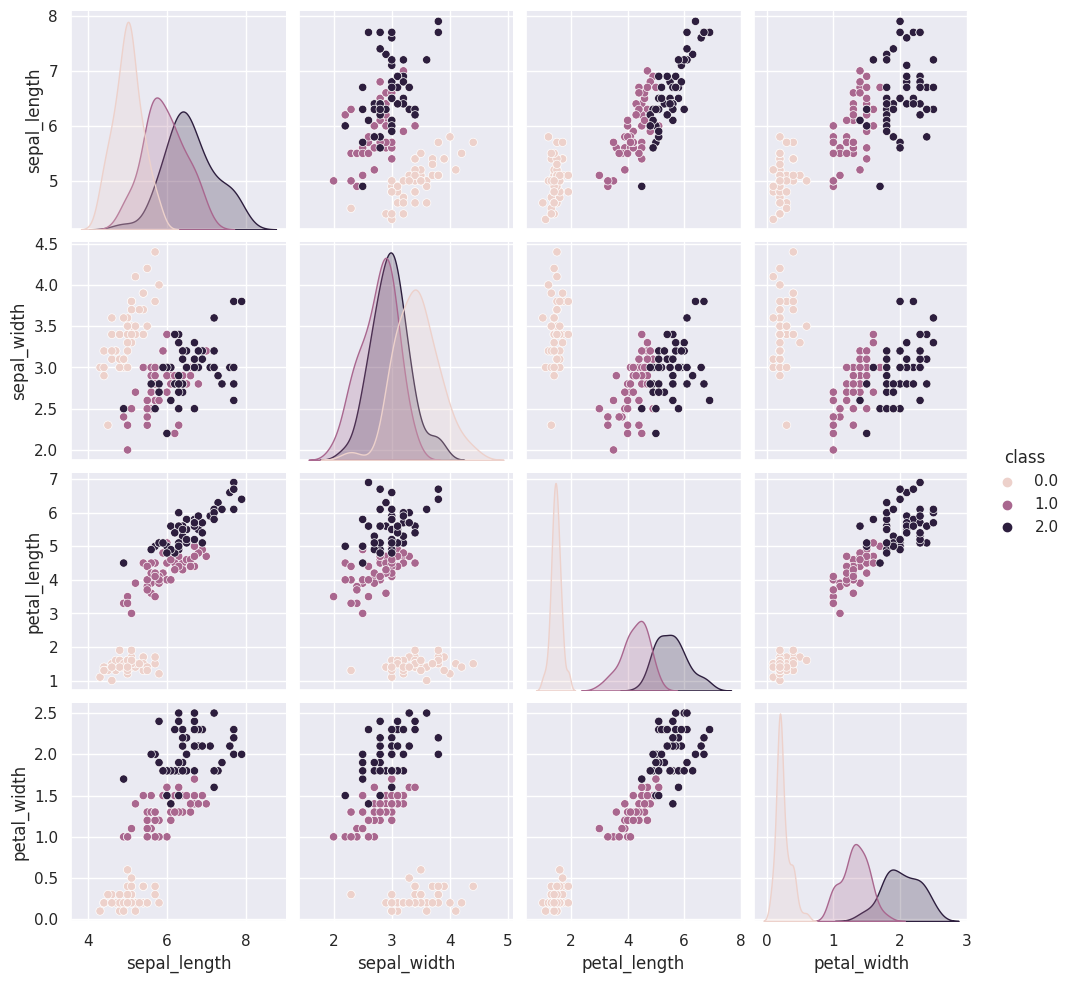

In [14]:
sns.pairplot(df, hue='class')
plt.plot()

In [67]:
df['class'].value_counts()

0.0    50
1.0    50
2.0    50
Name: class, dtype: int64

WNIOSKI 1:

1. Liczebność próbek w każdej z klas jest taka sama (po 50 próbek).
2. Zmienne petal length i petal width są wysoko skorelowane z klasą.

3. Zmienne sepal length i sepal width są słabiej skorelowane z klasą.

**Krok 5: Przygotowanie modelu.**

In [16]:
X = df.copy()
X = X[['petal_length', 'petal_width', 'class']]
y = X.pop('class')

In [17]:
X = X.values
y = y.values.astype('int16')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (112, 2)
X_test shape: (38, 2)
y_train shape: (112,)
y_test shape: (38,)




---


1. **MODEL DRZEW DECYZYJNYCH**

**Krok 6: Budowa funkcji dla modelu drzewa decyzyjnego.**

In [19]:
def make_decision_tree(max_depth=1):
    # trenowanie modelu
    classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=30)
    classifier.fit(X, y)

    # eksport grafu drzewa
    dot_data = StringIO()
    export_graphviz(classifier,
                   out_file=dot_data,
                   feature_names=feature_names[2:],
                   class_names=class_names,
                   special_characters=True,
                   rounded=True,
                   filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png('graph.png')

    # obliczenie dokładności
    acc = classifier.score(X, y)

    # wykreślenie granic decyzyjnych
    colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'
    plt.figure(figsize=(8, 6))
    ax = plot_decision_regions(X, y, classifier, legend=0, colors=colors)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['setosa', 'versicolor', 'virginica'], framealpha=0.3)
    plt.xlabel('petal length (cm)')
    plt.ylabel('petal width (cm)')
    plt.title(f'Drzewo decyzyjne: max_depth={max_depth}, accuracy={acc * 100:.2f}')

    return Image(graph.create_png(), width=150 + max_depth * 80)

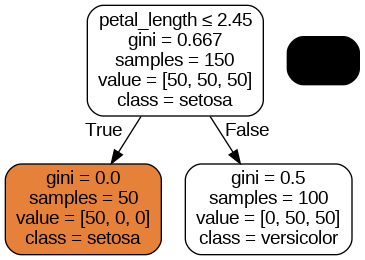

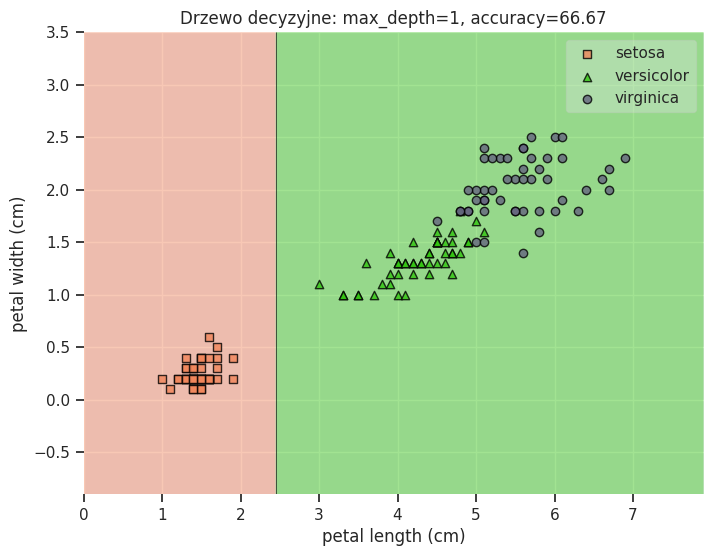

In [20]:
make_decision_tree(max_depth=1)

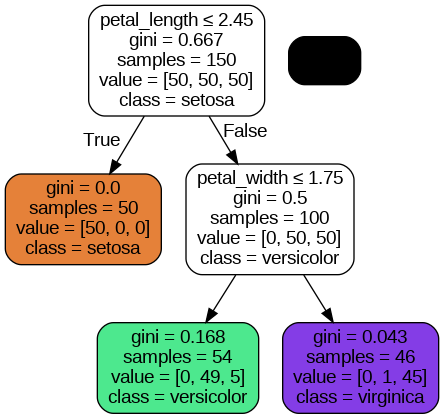

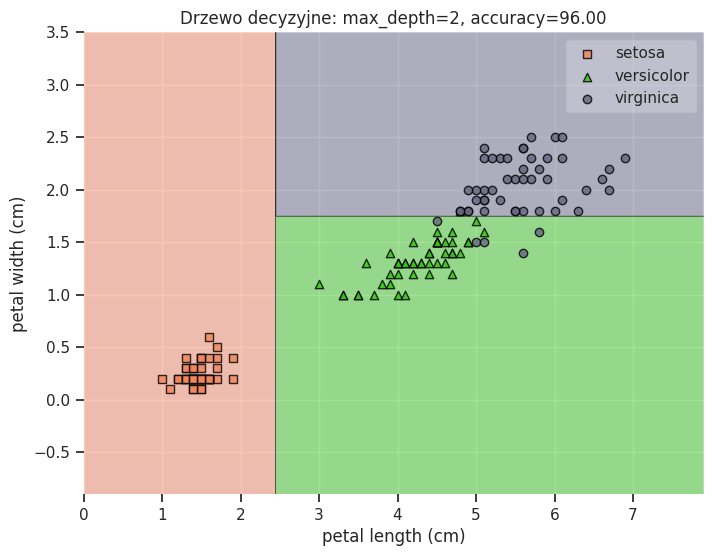

In [21]:
make_decision_tree(max_depth=2)

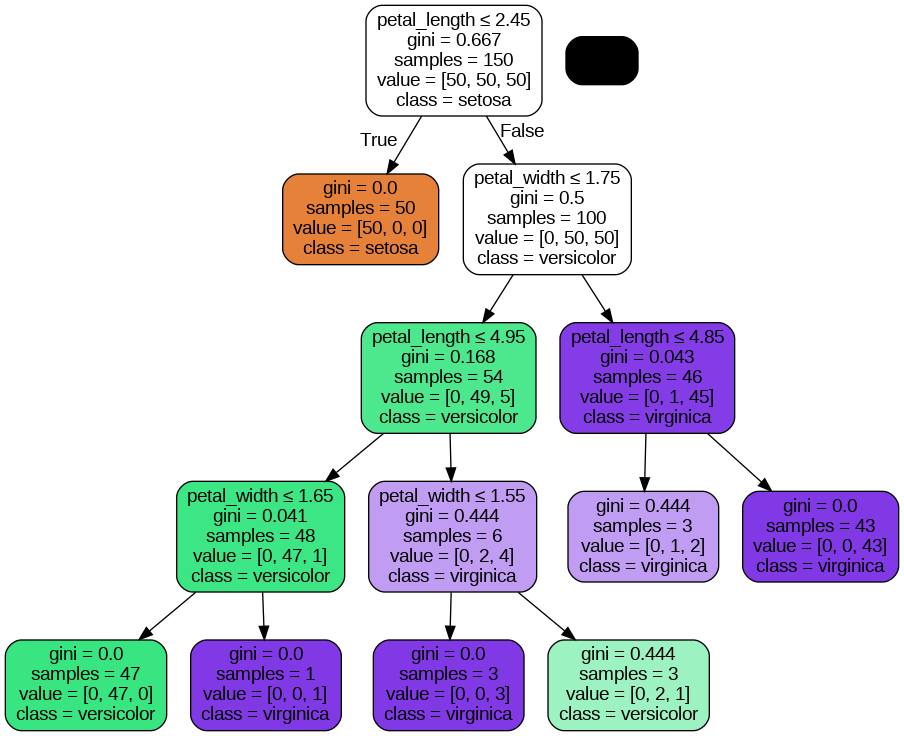

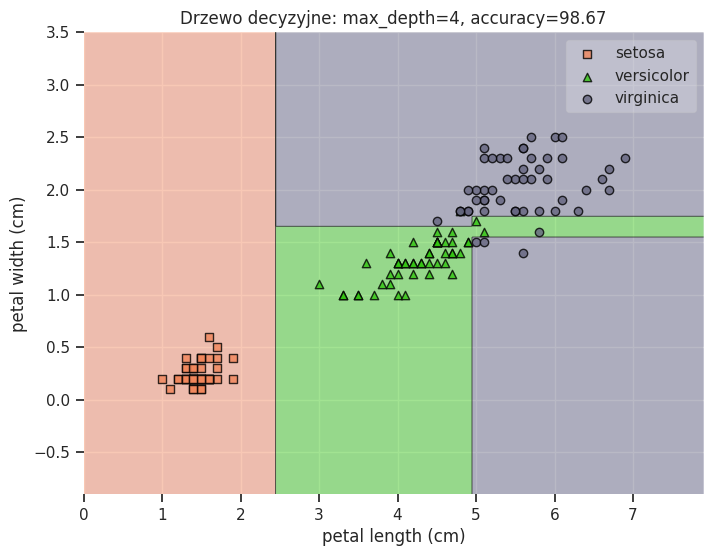

In [22]:
make_decision_tree(max_depth=4)

**Krok 7: Wybór optymalnych hiperparametrów dla drzewa decyzyjnego - GridSearch.**

In [23]:
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier()

params = {'max_depth': np.arange(1, 10),
         'min_samples_leaf': np.arange(1, 15)}

grid_search = GridSearchCV(tree, param_grid=params, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='accuracy')

In [24]:
grid_search.best_params_

{'max_depth': 4, 'min_samples_leaf': 1}

In [25]:
grid_search.score(X_train, y_train)

0.9821428571428571

In [26]:
grid_search.score(X_test, y_test)

0.9736842105263158

In [27]:
print('Najlepsza dokładność:', grid_search.best_score_)
print('Najlepsze parametry modelu', grid_search.best_params_)

Najlepsza dokładność: 0.9454545454545455
Najlepsze parametry modelu {'max_depth': 4, 'min_samples_leaf': 1}


In [28]:
model = grid_search.best_estimator_

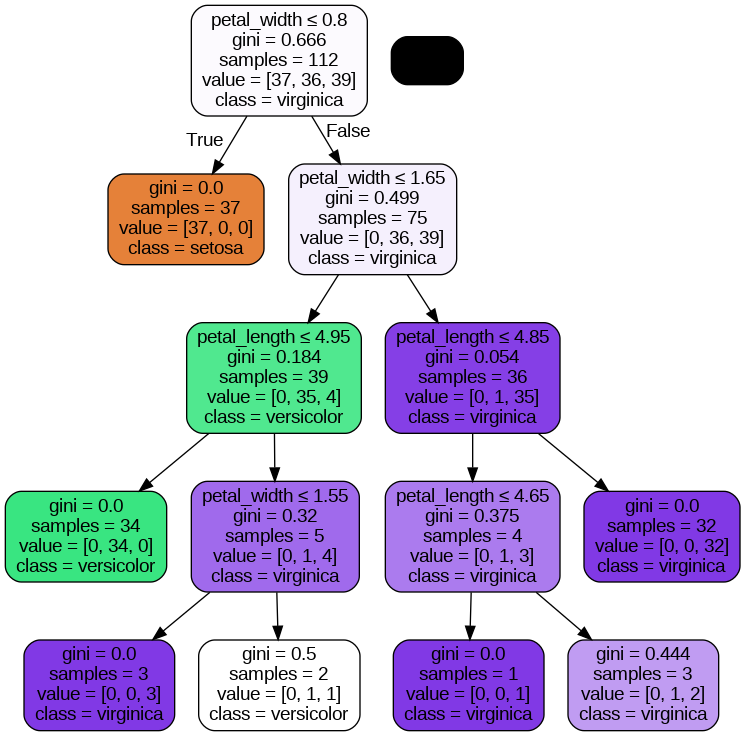

In [29]:
dot_data = StringIO()
export_graphviz(model,
                   out_file=dot_data,
                   feature_names=feature_names[2:],
                   class_names=class_names,
                   special_characters=True,
                   rounded=True,
                   filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')
Image(graph.create_png())

WNIOSKI 2:

1. Najlepsza dokładność na zbiorze testowym to **94,55 %**.
2. Najlepsze parametry dla modelu drzewa decyzyjnego to:
-  max_depth = 4,
- min_samples_leaf = 1.



---



2. **KLASYFIKACJA: ALGORYTM k-NAJBLIŻSZYCH SĄSIADÓW.**

**Krok 8: Granice decyzyjne w zależności od liczby sąsiadów.**

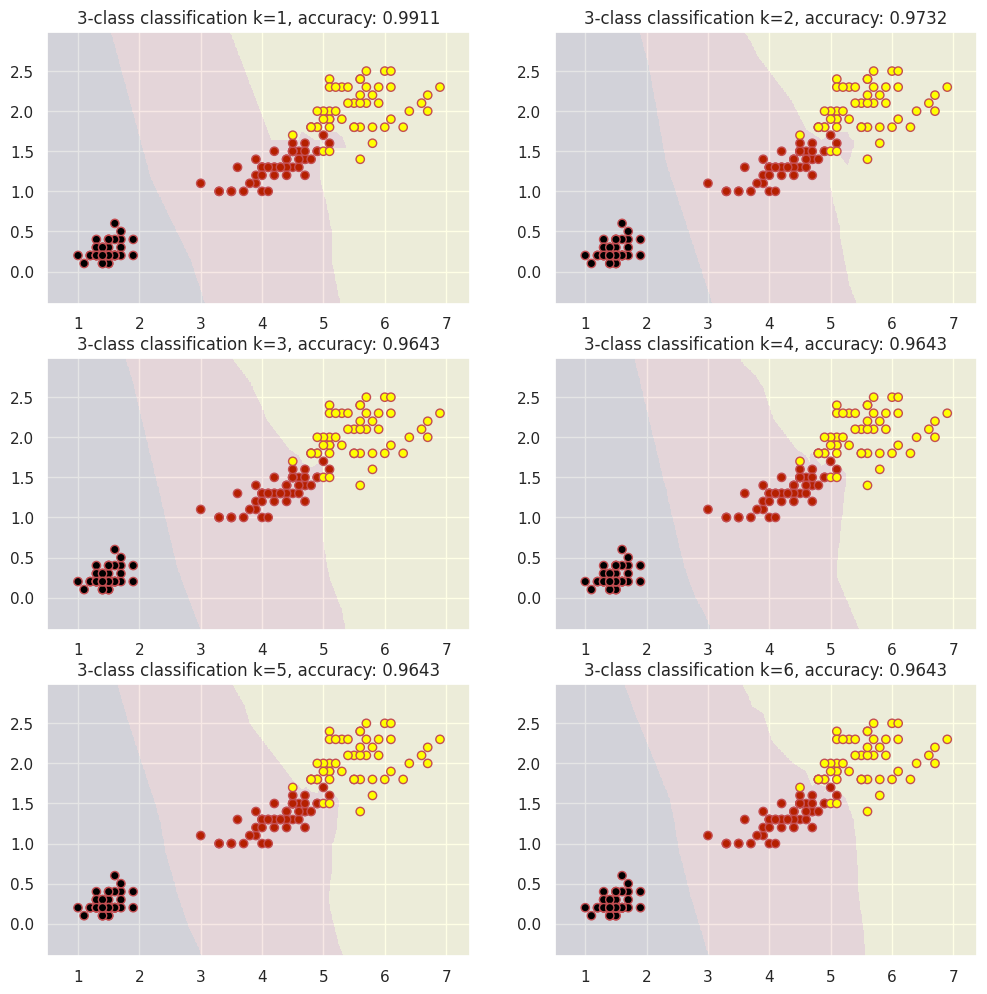

In [32]:
from sklearn.neighbors import KNeighborsClassifier

x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5

plt.figure(figsize=(12, 12))
for i in range(1, 7):
    plt.subplot(3, 2, i)
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train, y_train)
    accuracy = classifier.score(X_train, y_train)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    mesh = np.c_[xx.ravel(), yy.ravel()]
    Z = classifier.predict(mesh)
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha=0.1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='gnuplot', edgecolors='r')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'3-class classification k={i}, accuracy: {accuracy:.4f}')
plt.show()

**Krok 9: Wybór optymalnej liczby sąsiadów - GridSearch.**

In [51]:
grid_params = {'n_neighbors': range(2, 30)}

classifier = KNeighborsClassifier()

gs = GridSearchCV(classifier, grid_params, cv=3)
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 30)})

In [52]:
gs.best_params_

{'n_neighbors': 4}

In [53]:
k = gs.best_params_['n_neighbors']
k

4

In [54]:
classifier = gs.best_estimator_
classifier

KNeighborsClassifier(n_neighbors=4)

In [55]:
gs.best_score_

0.963963963963964

In [56]:
gs.score(X_train, y_train)

0.9642857142857143

In [57]:
gs.score(X_test, y_test)

0.9736842105263158

In [58]:
print('Najlepsza dokładnośc:', gs.best_score_)
print('Najlepsze parametry modelu', gs.best_params_)

Najlepsza dokładnośc: 0.963963963963964
Najlepsze parametry modelu {'n_neighbors': 4}


- Sprawdzenie granic decyzynych dla najlepszej liczby sąsiadów (liczba k)



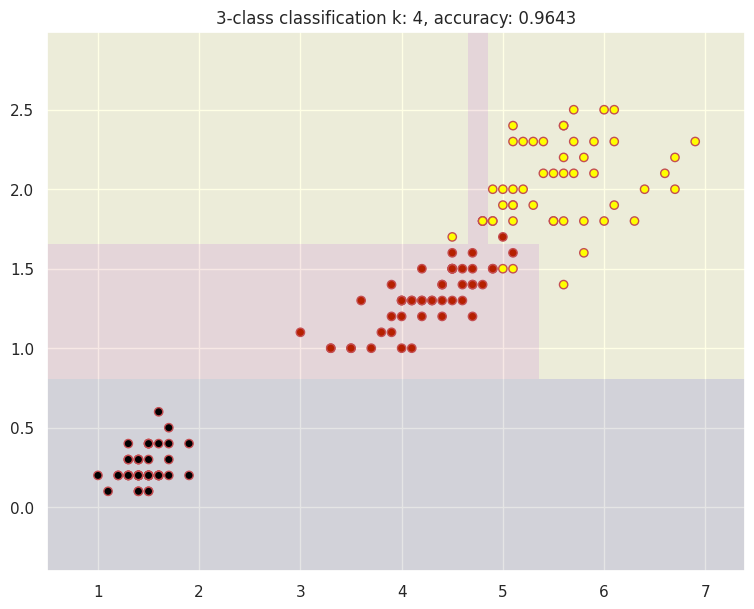

In [50]:
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
mesh = np.c_[xx.ravel(), yy.ravel()]
Z = gs.predict(mesh)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(9, 7))
plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='gnuplot', edgecolors='r')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f'3-class classification k: {k}, accuracy: {accuracy:.4f}')
plt.show()

WNIOSKI 3:

1. Najlepsza dokładność na zbiorze testowym to **96,40 %**.
2. Najlepsze parametry dla algorytmu k-najbliższych sąsiadów to:
- n_neighbors = 4.



---
3. **MODEL LASU LOSOWEGO.**


**Krok 10: Budowa modelu lasu losowego.**

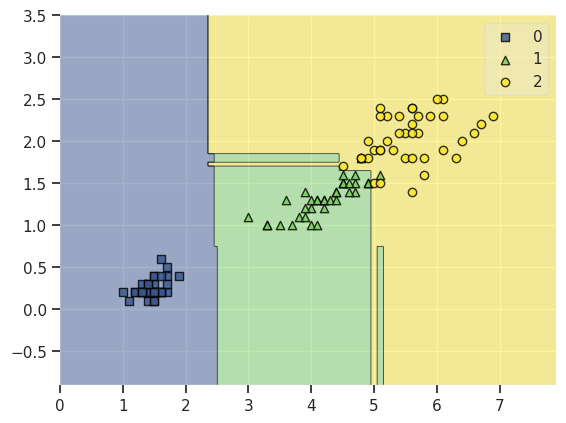

In [41]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=10)
forest.fit(X_train, y_train)
_ = plot_decision_regions(X_train, y_train, forest, colors='#39568CFF,#73D055FF,#FDE725FF')

[]

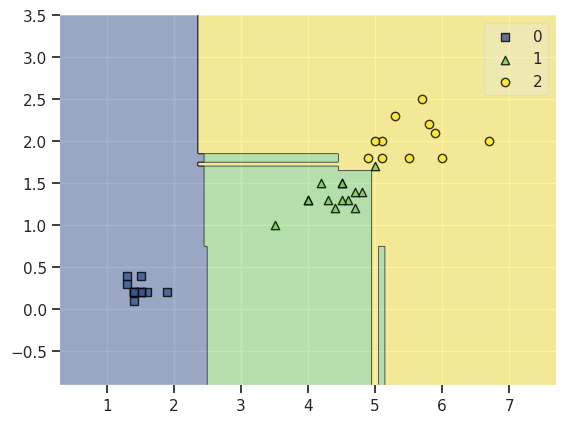

In [42]:
plot_decision_regions(X_test, y_test, forest, colors='#39568CFF,#73D055FF,#FDE725FF')
plt.plot()

In [43]:
forest.score(X_train, y_train)

0.9821428571428571

In [44]:
forest.score(X_test, y_test)

0.9736842105263158

**Krok 11: Wybór najlepszych hiperparametrów dla lasu losowego - GridSearch.**

In [61]:
param_grid = [{'n_estimators': np.arange(1, 100)}]

gs = GridSearchCV(forest, param_grid=param_grid, scoring='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=10), n_jobs=-1,
             param_grid=[{'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])}],
             scoring='accuracy')

In [62]:
gs.best_score_

0.9636363636363636

In [63]:
gs.best_params_

{'n_estimators': 16}

In [64]:
model = gs.best_estimator_

[]

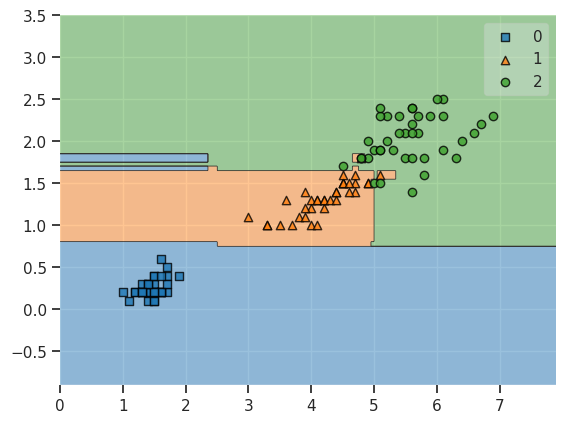

In [65]:
plot_decision_regions(X_train, y_train, model)
plt.plot()

In [66]:
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.9736842105263158

WNIOSKI 4:

1. Najlepsza dokładność na zbiorze testowym to **96,44 %**.
2. Najlepsze parametry dla modelu lasu losowego to:
- n_estimators = 16



---

**PODSUMOWANIE:**

1. Liczebność próbek w każdej z klas jest taka sama (po 50 próbek).

2. Zmienne petal length i petal width, które użyłam w algorytmach są wysoko skorelowane z klas.
3. Zbiór danych składający się z 150 próbek został podzielony na:
- 112 próbek danych treningowych,
- 38 próbek danych testowych.
4. Całość poszukiwań opieram na metodzie GridSearch, bazując na podanym przeze mnie intuicyjnym zakresie parametrów.
5. Wszystkie trzy algorytmy wykazały się wysoką skutecznością (powyżej 94 %).
6. **Najskuteczniejszy okazał się być model lasu losowego z prawdopodobieństwem przewidywania wyniku równym 96,44 %, dla liczby estymatorów równej 16.**
7. Zaledwie o 0,04 % niższa skuteczność (96,40 %) otrzymałam w przypadku algorytmu k-najbliższych sąsiadów (liczba sąsiadów równa 4).

SKUTECZNOŚĆ PRZEPROWADZONEGO BADANIA TO 96,44 %.